In [2]:
import numpy as np
import pandas as pd

In [3]:
# y_hat for logit
def logit_y_hat(X,betas):
    return 1/(1 + np.exp(-X.dot(betas)))

In [4]:
# logistic cost function
def cost_logit(betas, X,y):
    m = len(y)
    y_hat = logit_y_hat(X,betas)
    c = - 1/m * np.sum(y*(np.log(y_hat))+(1-y)*(np.log(1-y_hat)))
    return c

In [5]:
# generalized gradient discent non-matrix mutiplication method
def gradient_descent1(X,y,lr, itr):
    m = len(y)
    betas = np.zeros(X.shape[1])
    t = np.zeros(X.shape[1])
    c = []
    a = cost_logit(betas,X,y)
    c.append(a)
    i = 0
    while i < itr:
        y_hat = logit_y_hat(X,betas)
        t = lr*(1/m)*(X.T.dot(y_hat-y))
        betas = betas - t
        #print(betas)
        a = cost_logit(betas,X,y)
        #print('cost: ',a)
        c.append(a)
        i = i+1
        if c[-2] < c[-1]:
            break
    return (betas, c[-1],i)

In [6]:
# gradient discent with matrix multiplication
import numpy as np
def betas_matrix(X,y):
    X_trans = X.T
    betas = np.zeros(X.shape[1])
    betas = np.linalg.inv(X.T@X)@X.T@y
    return betas

In [7]:
# importing data
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/1/sgemm_product_dataset/sgemm_product.csv')
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [8]:
# creating target variable (average of 4 runtime)
data['av_run'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1).round(2)
print(data[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)','av_run']].head())

   Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  av_run
0     115.26     115.87     118.55     115.80  116.37
1      78.13      78.25      79.25      79.19   78.70
2      79.84      80.69      80.76      80.97   80.56
3      84.32      89.90      86.75      85.58   86.64
4     115.13     121.98     122.73     114.81  118.66


In [9]:
# dropping 4 obselete run columns
data.drop(columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], inplace = True)
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'av_run'],
      dtype='object')

In [10]:
# creating independent and dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.head())
print(y.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  
0   0  
1   1  
2   0  
3   1  
4   0  
0    116.37
1     78.70
2     80.56
3     86.64
4    118.66
Name: av_run, dtype: float64


In [11]:
X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

(241600, 14) (241600,)


In [12]:
X = np.hstack((np.ones(X.shape[0]).reshape(X.shape[0],1),X))
print(X.shape)              

(241600, 15)


In [13]:
# defining y for logistic regression
y_median = np.median(y)
binary_y = np.array([1 if y > y_median else 0 for y in y])
print(y[:20])
print(y_median)
print(binary_y[:20])

[116.37  78.7   80.56  86.64 118.66  83.16  84.44  94.51 119.08  86.3
  83.94  86.84 118.28  92.38  86.17 106.    77.31  65.12  72.07  63.89]
69.79
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


In [14]:
# splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,binary_y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(169120, 15)
(72480, 15)


In [15]:
print(X_train[0])
print(y_train[:10])

[ 1. 16. 32. 16.  8.  8. 16.  8.  8.  1.  4.  1.  1.  1.  0.]
[0 0 0 1 0 0 1 0 1 0]


In [16]:
# calculating betas for X and y train using batch method with different values of alpha
cost_list_list = {}
betas = {}
last_iteration = {}

for alpha in [0.00001,0.00003,0.00006,0.0001,0.0003]:
    betas[alpha], cost_list_list[alpha], last_iteration[alpha] = gradient_descent1(X_train,y_train,alpha, 10000)
print(betas)
print(cost_list_list)
print(last_iteration)

{1e-05: array([-0.00207523,  0.02413423,  0.01403618, -0.02387087, -0.06331364,
       -0.05220544, -0.02057618, -0.02097375, -0.01001678, -0.00286691,
       -0.00512205, -0.00354638, -0.00129765, -0.00415272, -0.00166621]), 3e-05: array([-0.00378035,  0.02635201,  0.01561918, -0.00861664, -0.09602224,
       -0.0804812 , -0.01391488, -0.0148848 , -0.01598736, -0.0090512 ,
       -0.0144671 , -0.00938374, -0.00265756, -0.01119434, -0.00376327]), 6e-05: array([-0.00613943,  0.02741796,  0.0164437 , -0.0011465 , -0.1088961 ,
       -0.09252159, -0.01105263, -0.01230756, -0.0215397 , -0.01774336,
       -0.02708292, -0.01795398, -0.00458039, -0.02154787, -0.00677972]), 0.0001: array([-0.00903883,  0.02794896,  0.0169787 ,  0.00176835, -0.1121285 ,
       -0.09566336, -0.01036768, -0.01186686, -0.02512607, -0.027344  ,
       -0.04098288, -0.029098  , -0.00698816, -0.03503294, -0.01062081]), 0.0003: array([-0.02114306,  0.02884813,  0.01809099,  0.00560787, -0.11308935,
       -0.09686871

In [18]:
# creating a function for accuracy_score
from sklearn.metrics import accuracy_score
def logit_acc_sc(beta, X, y_true):
    y_hat_logit = logit_y_hat(X, beta)
    y_hat_med = np.median(y_hat_logit)
    y_hat_binary = np.array([1 if y > y_hat_med else 0 for y in y_hat_logit])
    return accuracy_score(y_true, y_hat_binary)

print(logit_acc_sc(betas[0.0001], X_train, y_train))

0.8179576631977294


In [19]:
alpha_lt, acc_train, acc_test = [],[],[]
# calculating accuracy_score for different betas
for alpha, beta in betas.items():
    alpha_lt.append(alpha)
    acc_train.append(logit_acc_sc(beta, X_train, y_train))
    acc_test.append(logit_acc_sc(beta, X_test, y_test))

print(acc_train, acc_test)

[0.7917987228003784, 0.814835619678335, 0.8170234153263954, 0.8179576631977294, 0.8199917218543047] [0.7924530905077263, 0.8154387417218543, 0.8174806843267108, 0.8184188741721854, 0.8206539735099337]


In [20]:
# selecting best alpha for the model
logit_alpha = {}
logit_alpha['Alpha'] = alpha_lt
logit_alpha['Train Accuracy Score'] = acc_train
logit_alpha['Test Accuracy Score'] = acc_test

logit_alpha = pd.DataFrame(logit_alpha)
print(logit_alpha)

     Alpha  Train Accuracy Score  Test Accuracy Score
0  0.00001              0.791799             0.792453
1  0.00003              0.814836             0.815439
2  0.00006              0.817023             0.817481
3  0.00010              0.817958             0.818419
4  0.00030              0.819992             0.820654


<function matplotlib.pyplot.show(*args, **kw)>

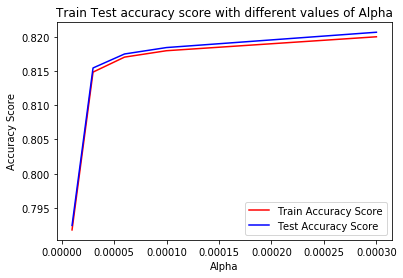

In [21]:
# plotting training and testing score for different values of alpha
import matplotlib.pyplot as plt
plt.plot(logit_alpha['Alpha'],logit_alpha['Train Accuracy Score'], label = 'Train Accuracy Score', color = 'Red')
plt.plot(logit_alpha['Alpha'],logit_alpha['Test Accuracy Score'], label = 'Test Accuracy Score', color = 'Blue')
plt.title('Train Test accuracy score with different values of Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show

In [22]:
# getting betas for different threasholds
b,c,li = 0,0,0
iterations, betas_itr, cost_itr = [],[],[]

for itr in [5000,10000,20000,40000]:
    b, c, li = gradient_descent1(X_train,y_train,0.0003, itr)
    iterations.append(itr)
    betas_itr.append(b)
    cost_itr.append(c)

iter_acc = {}
iter_acc['Iterations'] = iterations
iter_acc['Betas'] = betas_itr

In [23]:
acc_train, acc_test = [],[]
# calculating accuracy_score for different betas
for beta in betas_itr:
    acc_train.append(logit_acc_sc(beta, X_train, y_train))
    acc_test.append(logit_acc_sc(beta, X_test, y_test))

iter_acc['Train Accuracy'] = acc_train
iter_acc['Test Accuracy'] = acc_test
print(iter_acc)

{'Iterations': [5000, 10000, 20000, 40000], 'Betas': [array([-0.01236855,  0.02829132,  0.01739236,  0.00330287, -0.11273601,
       -0.09634328, -0.0102699 , -0.01200518, -0.02643146, -0.03645918,
       -0.05433796, -0.04262772, -0.00979897, -0.05143373, -0.01518442]), array([-0.02114306,  0.02884813,  0.01809099,  0.00560787, -0.11308935,
       -0.09686871, -0.01022517, -0.01238898, -0.0247452 , -0.05143889,
       -0.07707439, -0.08099542, -0.01730647, -0.09806437, -0.02771455]), array([-0.03584061,  0.02926023,  0.0185936 ,  0.00776995, -0.11317573,
       -0.0970651 , -0.00981486, -0.01228324, -0.02120736, -0.05840154,
       -0.0894516 , -0.14965622, -0.02967426, -0.18179612, -0.04918992]), array([-0.05958774,  0.02956389,  0.01890138,  0.0101088 , -0.11305806,
       -0.09693935, -0.008845  , -0.01143915, -0.01775843, -0.05574203,
       -0.08875812, -0.26165465, -0.04783896, -0.31892578, -0.08242826])], 'Train Accuracy': [0.8185844370860927, 0.8199917218543047, 0.821150662251

In [24]:
iteration_results = pd.DataFrame(iter_acc)
print(iteration_results)

   Iterations                                              Betas  \
0        5000  [-0.012368548538274413, 0.028291315358885096, ...   
1       10000  [-0.02114306011224296, 0.028848130684427136, 0...   
2       20000  [-0.03584061341786128, 0.029260228302956066, 0...   
3       40000  [-0.05958774394760825, 0.029563886835344912, 0...   

   Train Accuracy  Test Accuracy  
0        0.818584       0.819109  
1        0.819992       0.820654  
2        0.821151       0.821509  
3        0.821494       0.821565  


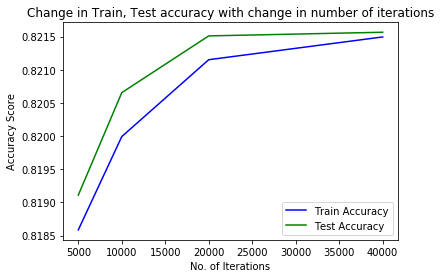

In [25]:
# Plotting train and test accuracy with number of iterations
plt.plot(iteration_results['Iterations'],iteration_results['Train Accuracy'],label = 'Train Accuracy', color = 'Blue')
plt.plot(iteration_results['Iterations'],iteration_results['Test Accuracy'], label = 'Test Accuracy', color = 'Green')
plt.title('Change in Train, Test accuracy with change in number of iterations')
plt.xlabel('No. of Iterations')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [38]:
# selecting 8 prominant features to train model
f8 = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI']
X_train_8 = X_train[:,range(9)]
X_test_8 = X_test[:,range(9)]

# training a new model on chosen 8 features
beta_8, _, _ = gradient_descent1(X_train_8,y_train,0.0003, 40000)

print("Train Accuracy: ", logit_acc_sc(beta_8, X_train_8, y_train))
print("Test Accuracy: ", logit_acc_sc(beta_8, X_test_8, y_test))

Train Accuracy:  0.8162724692526017
Test Accuracy:  0.8163217439293599


In [65]:
# randomly selecting 8 features and thraining model on it
np.random.seed(42)
f8_random = np.random.choice(range(1,15), size = 8, replace = False)

X_train_random8 = X_train[:,f8_random]
X_test_random8 = X_test[:,f8_random]

X_train_random8 = np.hstack((np.ones(X_train_random8.shape[0]).reshape(X_train_random8.shape[0],1),X_train_random8))
X_test_random8 = np.hstack((np.ones(X_test_random8.shape[0]).reshape(X_test_random8.shape[0],1),X_test_random8))

# training a new model on randomly chosen 8 features
beta_random8, _, _ = gradient_descent1(X_train_random8,y_train,0.0003, 40000)

print("Train Accuracy: ", logit_acc_sc(beta_random8, X_train_random8, y_train))
print("Test Accuracy: ", logit_acc_sc(beta_random8, X_test_random8, y_test))

Train Accuracy:  0.7104304635761589
Test Accuracy:  0.7087610375275938
